# Cabeçalho

In [86]:
# 2021 Thiago Pacheco Carneiro

from astropy.io import fits
from astropy.table import Table

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [2]:
def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

# Limpeza

In [3]:
arquivo_fits='specz_debom_allsky_SDSSDR16.fits'
tabela, colunas = open_fits_catalog(arquivo_fits)

In [4]:
tabela

specObjID,ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
float64,float64,float64,str6,float64,float64,str8,str12,str8,str12,str8,str12,str8,str12
2.994896769751716e+17,146.71421,-1.0413043,GALAXY,0.02127545,9.121824e-06,17.12867,0.02102659,15.6145,0.00945763,14.84587,0.008144742,14.44303,0.008184839
2.994896774449336e+17,146.71421,-1.0413043,GALAXY,0.02122228,9.465381e-06,17.12867,0.02102659,15.6145,0.00945763,14.84587,0.008144742,14.44303,0.008184839
2.994899518530785e+17,146.91945,-0.99049175,GALAXY,0.2139246,5.23439e-05,19.89724,0.221153,18.66516,0.04116745,17.66371,0.01830017,17.29358,0.02671436
2.994899523228406e+17,146.74413,-0.65219064,GALAXY,0.2037833,3.89048e-05,20.79233,0.3380686,19.23255,0.03877875,17.79019,0.01971692,17.21832,0.01794012
2.994905016088924e+17,146.85983,-0.80890165,GALAXY,0.1265536,6.185426e-05,20.59526,0.3731141,18.65869,0.0299438,17.43989,0.01589669,16.9439,0.01493528
2.9949050207865446e+17,146.62857,-0.76513683,GALAXY,0.06465632,2.0662e-05,19.72187,0.1515515,17.708,0.02945771,16.83504,0.02319035,16.39123,0.01871121
2.9949077648679936e+17,146.76339,-0.81043316,GALAXY,0.4486449,0.0001679451,25.79026,5.215773,21.34879,0.4266613,19.29993,0.09123418,18.621,0.07033348
2.994910513647063e+17,146.9639,-0.54500256,GALAXY,0.05598787,1.141557e-05,null,null,null,null,null,null,null,null
2.9949105183446835e+17,146.63167,-0.98827781,GALAXY,0.05265425,8.614109e-06,19.50893,0.101994,18.38805,0.02164089,17.84603,0.01789545,17.53182,0.02207784


In [5]:
colunas.names

['specObjID',
 'ra',
 'dec',
 'class',
 'z',
 'zErr',
 'petroMag_u',
 'petroMagErr_u',
 'petroMag_g',
 'petroMagErr_g',
 'petroMag_r',
 'petroMagErr_r',
 'petroMag_i',
 'petroMagErr_i']

In [6]:
colunas_numéricas = colunas.names[1:3]+colunas.names[4:]
colunas_numéricas

['ra',
 'dec',
 'z',
 'zErr',
 'petroMag_u',
 'petroMagErr_u',
 'petroMag_g',
 'petroMagErr_g',
 'petroMag_r',
 'petroMagErr_r',
 'petroMag_i',
 'petroMagErr_i']

In [7]:
tabela[colunas_numéricas]

ra,dec,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
float64,float64,float64,float64,str8,str12,str8,str12,str8,str12,str8,str12
146.71421,-1.0413043,0.02127545,9.121824e-06,17.12867,0.02102659,15.6145,0.00945763,14.84587,0.008144742,14.44303,0.008184839
146.71421,-1.0413043,0.02122228,9.465381e-06,17.12867,0.02102659,15.6145,0.00945763,14.84587,0.008144742,14.44303,0.008184839
146.91945,-0.99049175,0.2139246,5.23439e-05,19.89724,0.221153,18.66516,0.04116745,17.66371,0.01830017,17.29358,0.02671436
146.74413,-0.65219064,0.2037833,3.89048e-05,20.79233,0.3380686,19.23255,0.03877875,17.79019,0.01971692,17.21832,0.01794012
146.85983,-0.80890165,0.1265536,6.185426e-05,20.59526,0.3731141,18.65869,0.0299438,17.43989,0.01589669,16.9439,0.01493528
146.62857,-0.76513683,0.06465632,2.0662e-05,19.72187,0.1515515,17.708,0.02945771,16.83504,0.02319035,16.39123,0.01871121
146.76339,-0.81043316,0.4486449,0.0001679451,25.79026,5.215773,21.34879,0.4266613,19.29993,0.09123418,18.621,0.07033348
146.9639,-0.54500256,0.05598787,1.141557e-05,null,null,null,null,null,null,null,null
146.63167,-0.98827781,0.05265425,8.614109e-06,19.50893,0.101994,18.38805,0.02164089,17.84603,0.01789545,17.53182,0.02207784


In [8]:
df=tabela.to_pandas()
df

,specObjID,ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
0,2.994897e+17,146.714210,-1.041304,GALAXY,0.021275,0.000009,17.12867,0.02102659,15.6145,0.00945763,14.84587,0.008144742,14.44303,0.008184839
1,2.994897e+17,146.714210,-1.041304,GALAXY,0.021222,0.000009,17.12867,0.02102659,15.6145,0.00945763,14.84587,0.008144742,14.44303,0.008184839
2,2.994900e+17,146.919450,-0.990492,GALAXY,0.213925,0.000052,19.89724,0.221153,18.66516,0.04116745,17.66371,0.01830017,17.29358,0.02671436
3,2.994900e+17,146.744130,-0.652191,GALAXY,0.203783,0.000039,20.79233,0.3380686,19.23255,0.03877875,17.79019,0.01971692,17.21832,0.01794012
4,2.994905e+17,146.859830,-0.808902,GALAXY,0.126554,0.000062,20.59526,0.3731141,18.65869,0.0299438,17.43989,0.01589669,16.9439,0.01493528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338062,4.459433e+17,15.039689,-0.179618,STAR,-0.000560,0.000011,18.27383,0.01478433,17.1798,0.003236198,16.96035,0.003409309,16.91121,0.004151301
3338063,4.459435e+17,15.323412,-0.294214,GALAXY,0.189903,0.000015,19.88128,0.07333352,18.93501,0.01849458,18.43681,0.01837495,18.13481,0.02082617
3338064,4.459441e+17,15.172908,-0.444550,GALAXY,0.043709,0.000011,18.2541,0.04377979,16.51601,0.01310113,15.73698,0.01387848,15.38086,0.01292664
3338065,4.459446e+17,15.731016,1.140221,GALAXY,0.143501,0.000032,20.88922,0.3276213,18.68918,0.01786709,17.5765,0.0113072,17.111,0.01180846


In [9]:
for coluna in colunas_numéricas:
    df[coluna]=pd.to_numeric(df[coluna],errors='coerce')
df

,specObjID,ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
0,2.994897e+17,146.714210,-1.041304,GALAXY,0.021275,0.000009,17.12867,0.021027,15.61450,0.009458,14.84587,0.008145,14.44303,0.008185
1,2.994897e+17,146.714210,-1.041304,GALAXY,0.021222,0.000009,17.12867,0.021027,15.61450,0.009458,14.84587,0.008145,14.44303,0.008185
2,2.994900e+17,146.919450,-0.990492,GALAXY,0.213925,0.000052,19.89724,0.221153,18.66516,0.041167,17.66371,0.018300,17.29358,0.026714
3,2.994900e+17,146.744130,-0.652191,GALAXY,0.203783,0.000039,20.79233,0.338069,19.23255,0.038779,17.79019,0.019717,17.21832,0.017940
4,2.994905e+17,146.859830,-0.808902,GALAXY,0.126554,0.000062,20.59526,0.373114,18.65869,0.029944,17.43989,0.015897,16.94390,0.014935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338062,4.459433e+17,15.039689,-0.179618,STAR,-0.000560,0.000011,18.27383,0.014784,17.17980,0.003236,16.96035,0.003409,16.91121,0.004151
3338063,4.459435e+17,15.323412,-0.294214,GALAXY,0.189903,0.000015,19.88128,0.073334,18.93501,0.018495,18.43681,0.018375,18.13481,0.020826
3338064,4.459441e+17,15.172908,-0.444550,GALAXY,0.043709,0.000011,18.25410,0.043780,16.51601,0.013101,15.73698,0.013878,15.38086,0.012927
3338065,4.459446e+17,15.731016,1.140221,GALAXY,0.143501,0.000032,20.88922,0.327621,18.68918,0.017867,17.57650,0.011307,17.11100,0.011808


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338067 entries, 0 to 3338066
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   specObjID      float64
 1   ra             float64
 2   dec            float64
 3   class          object 
 4   z              float64
 5   zErr           float64
 6   petroMag_u     float64
 7   petroMagErr_u  float64
 8   petroMag_g     float64
 9   petroMagErr_g  float64
 10  petroMag_r     float64
 11  petroMagErr_r  float64
 12  petroMag_i     float64
 13  petroMagErr_i  float64
dtypes: float64(13), object(1)
memory usage: 356.5+ MB


In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318621 entries, 0 to 3338066
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   specObjID      float64
 1   ra             float64
 2   dec            float64
 3   class          object 
 4   z              float64
 5   zErr           float64
 6   petroMag_u     float64
 7   petroMagErr_u  float64
 8   petroMag_g     float64
 9   petroMagErr_g  float64
 10  petroMag_r     float64
 11  petroMagErr_r  float64
 12  petroMag_i     float64
 13  petroMagErr_i  float64
dtypes: float64(13), object(1)
memory usage: 379.8+ MB


In [12]:
(df==-9999.0).sum()

specObjID          0
ra                 0
dec                0
class              0
z                  0
zErr               0
petroMag_u       163
petroMagErr_u    163
petroMag_g       153
petroMagErr_g    153
petroMag_r       120
petroMagErr_r    120
petroMag_i       136
petroMagErr_i    136
dtype: int64

In [13]:
for coluna in colunas_numéricas:
    df=df[df[coluna]!=-9999.0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318450 entries, 0 to 3338066
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   specObjID      float64
 1   ra             float64
 2   dec            float64
 3   class          object 
 4   z              float64
 5   zErr           float64
 6   petroMag_u     float64
 7   petroMagErr_u  float64
 8   petroMag_g     float64
 9   petroMagErr_g  float64
 10  petroMag_r     float64
 11  petroMagErr_r  float64
 12  petroMag_i     float64
 13  petroMagErr_i  float64
dtypes: float64(13), object(1)
memory usage: 379.8+ MB


# Análise

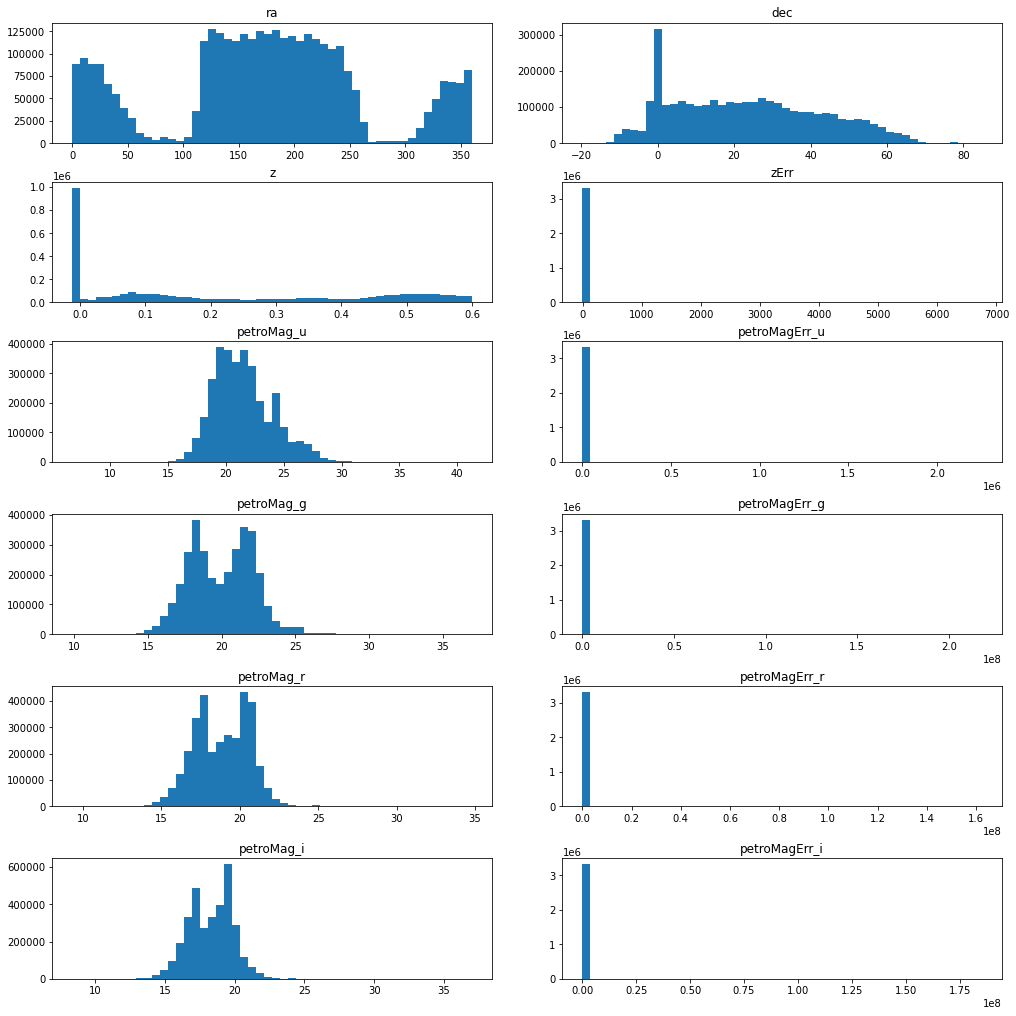

In [15]:
fig = plt.figure(figsize=(14, 14), constrained_layout=True)
metade_das_colunas = (len(colunas_numéricas)+1)//2
gs = fig.add_gridspec(metade_das_colunas,2, left=0.05, right=0.5, wspace=0.05)

for i, coluna in enumerate(colunas_numéricas):
    ax = fig.add_subplot(gs[i//2, i%2])
    ax.hist(df[coluna],bins=50)
    ax.set_title(coluna)

<AxesSubplot:>

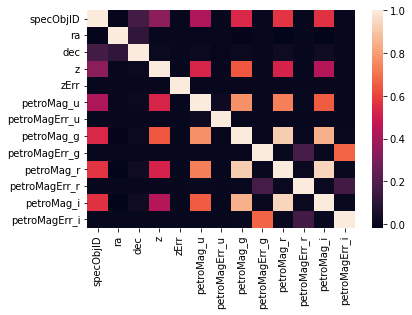

In [22]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [75]:
classes=np.unique(df['class'])

In [ ]:
x = list(df.columns[4:])
x

In [118]:
df['classe_n']=(2 * (df['class']=='STAR  '))-1
df['classe_n']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
3338062    1
3338063   -1
3338064   -1
3338065   -1
3338066   -1
Name: classe_n, Length: 3318450, dtype: int64

In [61]:
tamanho_treino = int(.7 * len(df))
tamanho_teste = int(.2 * len(df))
treino, teste, validação = np.split(df.sample(frac=1),[tamanho_treino,tamanho_treino+tamanho_teste])
print(f'{len(treino) = }, {len(teste) = }, {len(validação) = }')

len(treino) = 2322915, len(teste) = 663690, len(validação) = 331845


In [65]:
regressor = RandomForestRegressor(n_estimators=10).fit(treino[x],treino[y])
predições = regressor.predict(teste[x])
    

In [110]:
classificador = [0] * 9
for i in range(9):
    classificador[i] = RandomForestClassifier(n_estimators=i+1).fit(treino[x],treino['class'])

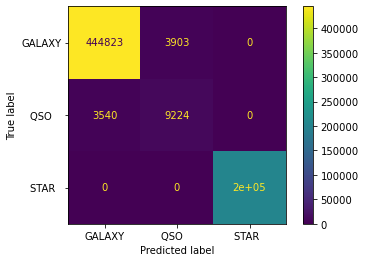

In [89]:
ConfusionMatrixDisplay.from_estimator(classificador[1],teste[x],teste['class'])

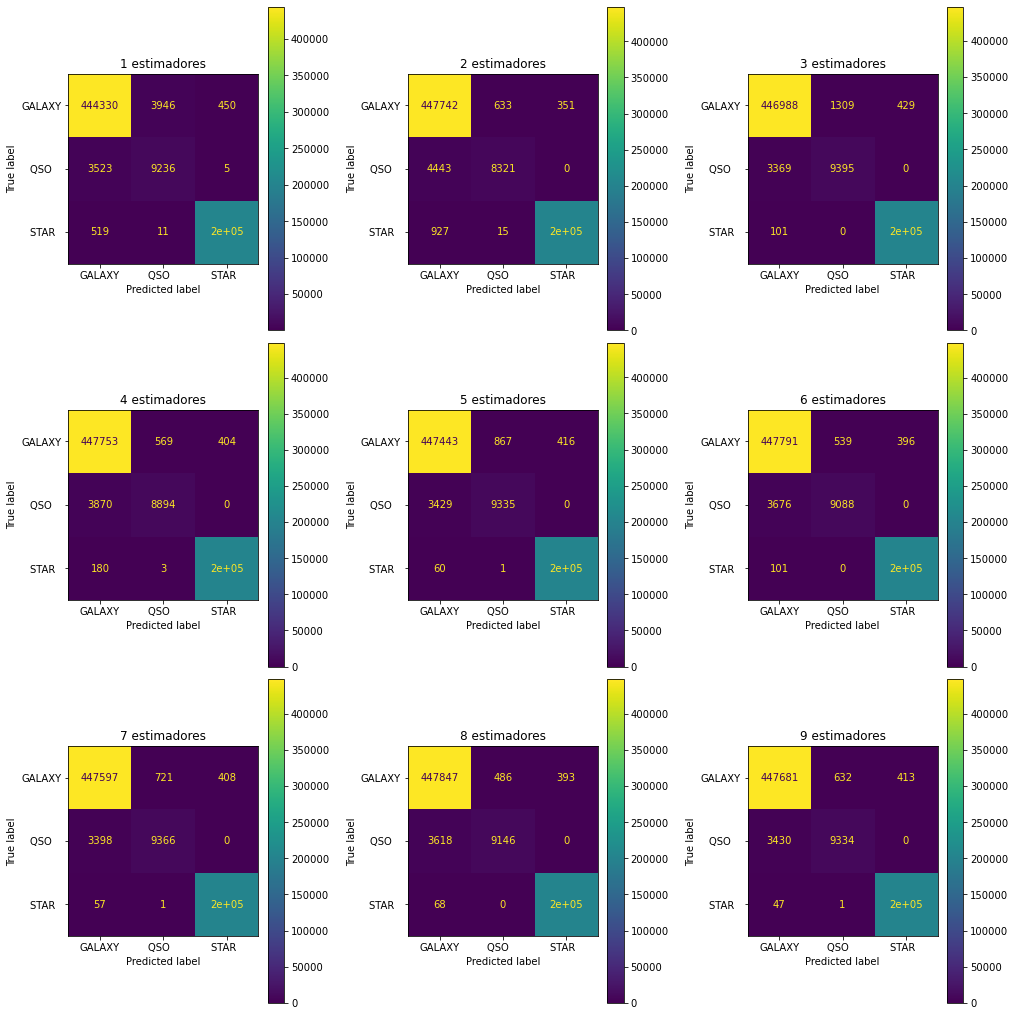

In [111]:
fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(3,3, left=0.05, right=0.5, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(gs[i//3, i%3])
    ConfusionMatrixDisplay.from_estimator(classificador[i],teste[x],teste['class'],ax=ax)
    ax.set_title(f'{i+1} estimadores')

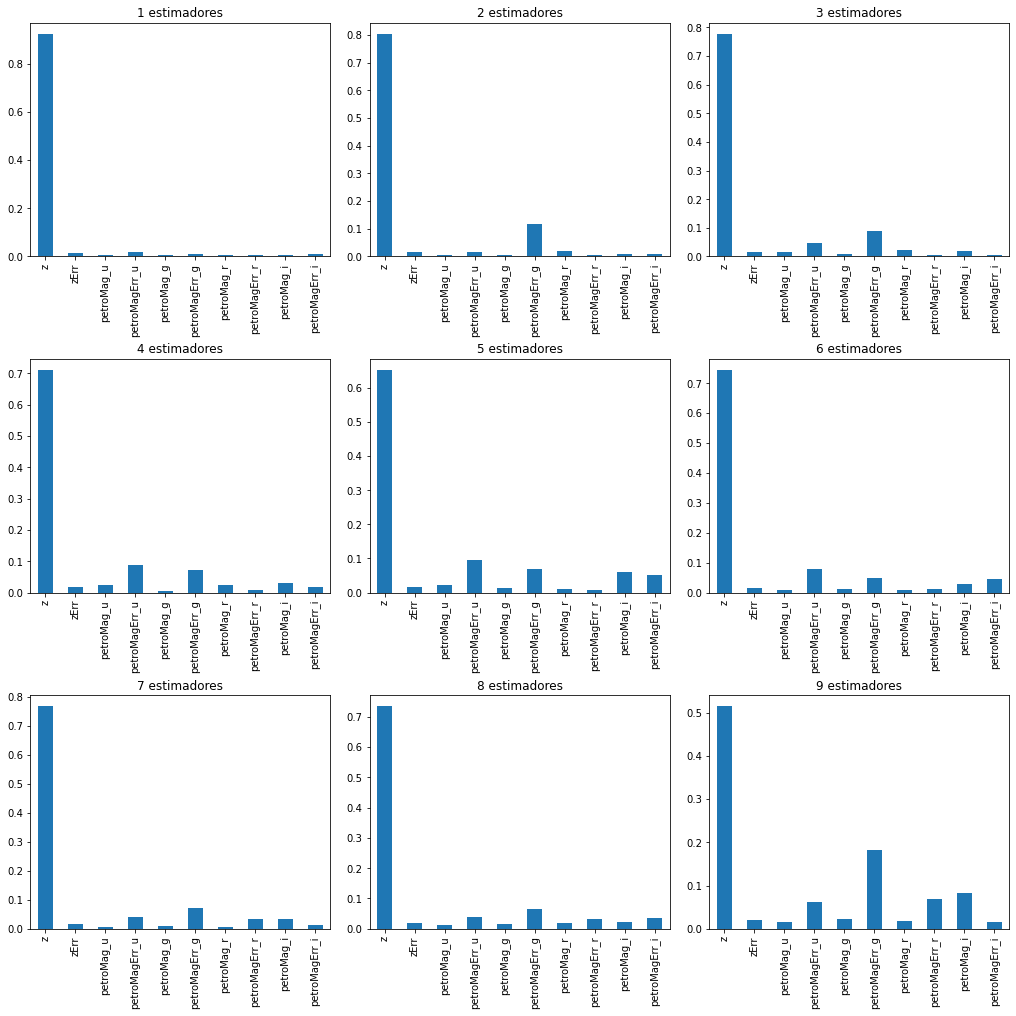

In [114]:
feature_names = list((treino[x].columns))

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(3,3, left=0.05, right=0.5, wspace=0.05)

for i in range(9):
    importances = classificador[i].feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    ax = fig.add_subplot(gs[i//3, i%3])
    forest_importances.plot.bar(ax=ax)
    ax.set_title(f'{i+1} estimadores')

In [120]:
x_n = x[1:]
classificador_n = [0] * 9
for i in range(9):
    classificador_n[i] = RandomForestClassifier(n_estimators=i+1).fit(treino[x_n],treino['classe_n'])

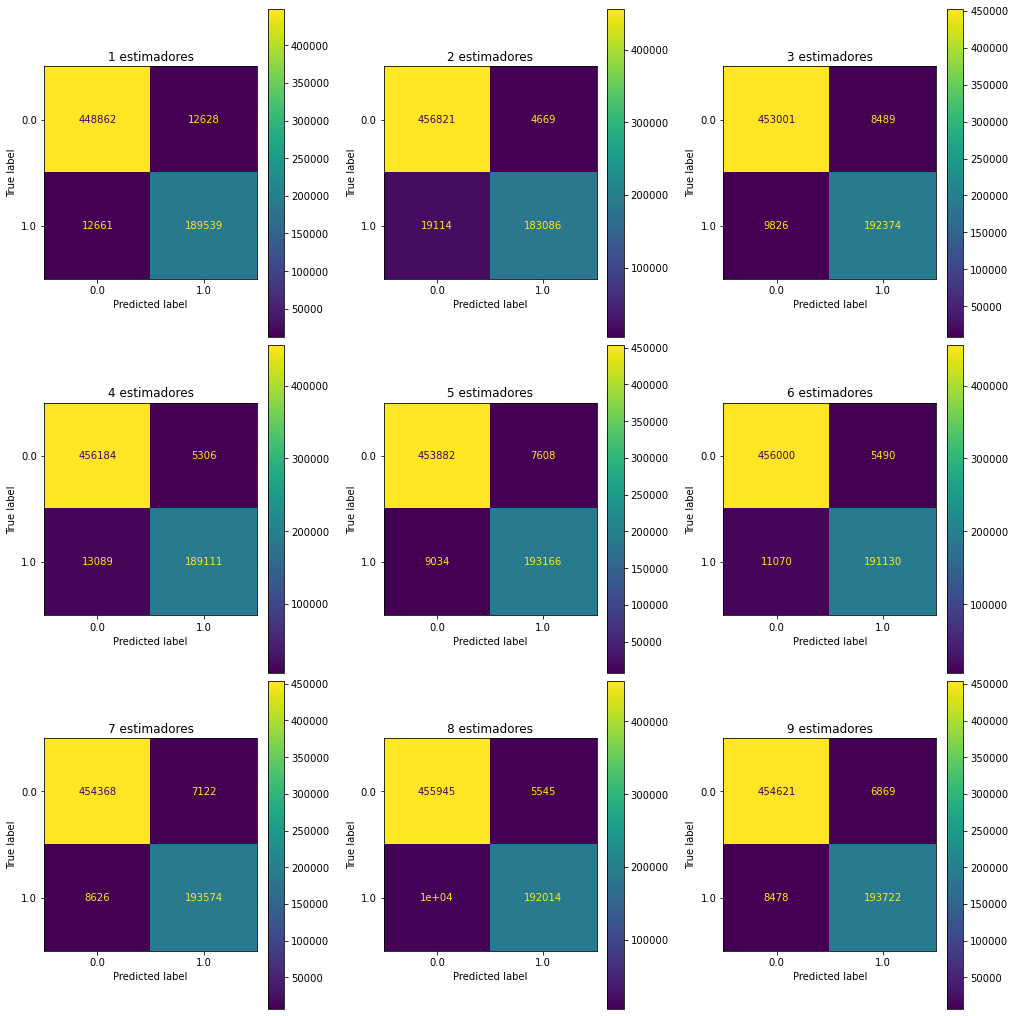

In [121]:
fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(3,3, left=0.05, right=0.5, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(gs[i//3, i%3])
    ConfusionMatrixDisplay.from_estimator(classificador_n[i],teste[x_n],teste['classe_n'],ax=ax)
    ax.set_title(f'{i+1} estimadores')

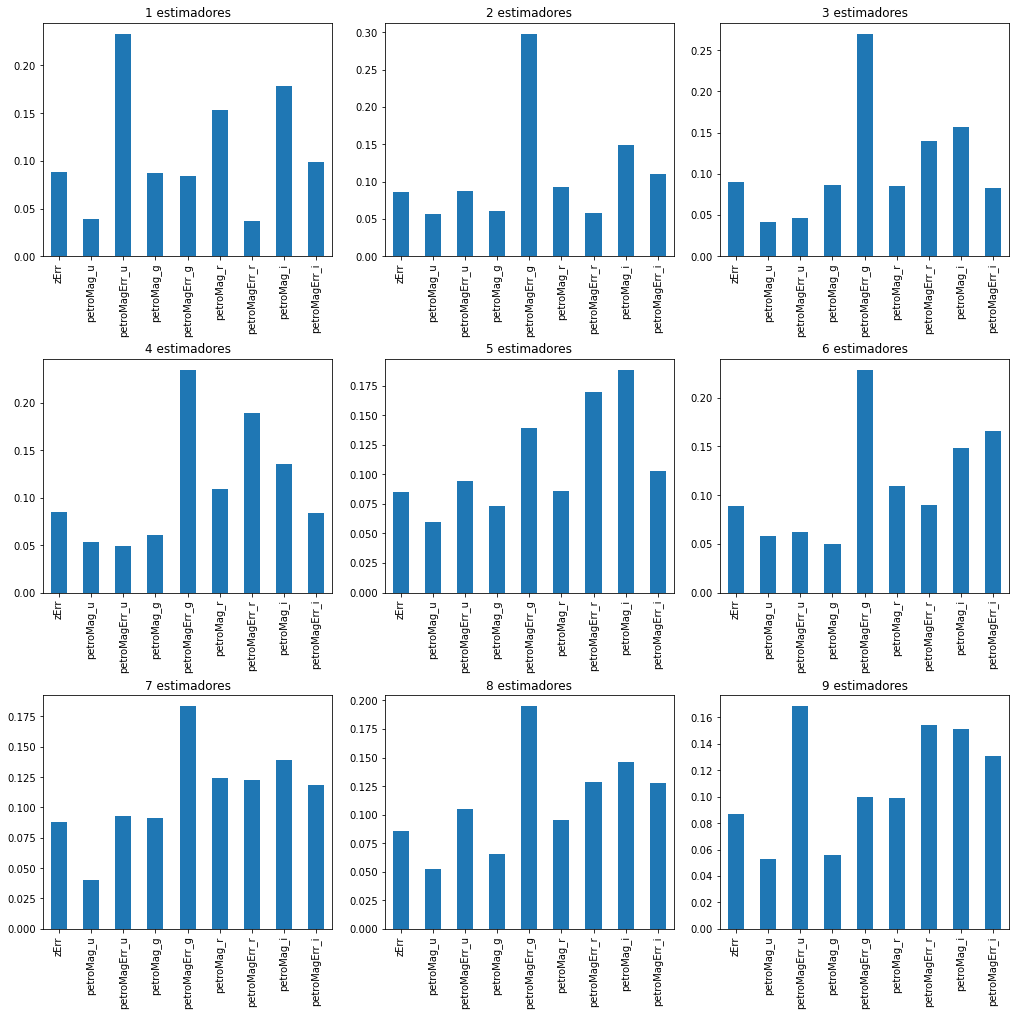

In [122]:
feature_names = list((treino[x_n].columns))

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(3,3, left=0.05, right=0.5, wspace=0.05)

for i in range(9):
    importances = classificador_n[i].feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    ax = fig.add_subplot(gs[i//3, i%3])
    forest_importances.plot.bar(ax=ax)
    ax.set_title(f'{i+1} estimadores')

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(teste['classe_n'],classificador_n[5].predict(teste[x_n]))

0.9666779882065658

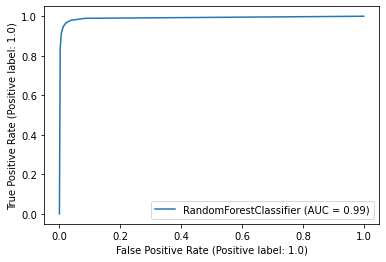

In [125]:

RocCurveDisplay.from_estimator(classificador_n[5],teste[x_n],teste['classe_n'])

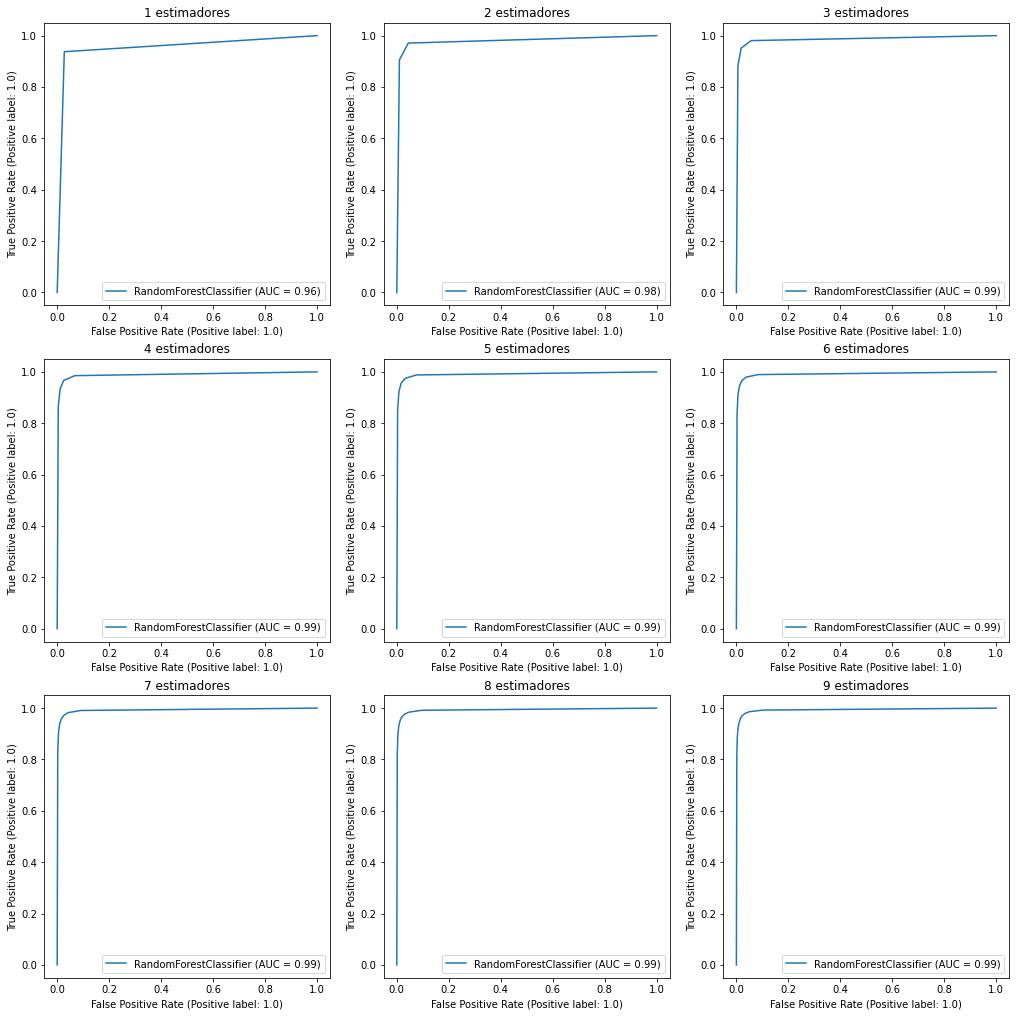

In [126]:
fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(3,3, left=0.05, right=0.5, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(gs[i//3, i%3])
    RocCurveDisplay.from_estimator(classificador_n[i],teste[x_n],teste['classe_n'],ax=ax)
    ax.set_title(f'{i+1} estimadores')